In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize

https://stackoverflow.com/questions/78593373/fitting-a-planck-curve-on-my-spectrometer-data

In [9]:
data = pd.read_csv("https://pastebin.com/raw/xdLY6aLG", sep="\t", decimal=",").dropna(axis=1)

In [20]:
data["Wavelength"] /= 1e9
#["Intensity"] -= data["Intensity"].min()

In [11]:
h = 6.62607015e-34
c = 299792458
kb = 1.380649e-23

In [25]:
def model(x, T, A):
    return A * 2 * c* kb * T / np.power(x, 4)

In [26]:
popt, pcov = optimize.curve_fit(model, data["Wavelength"], data["Intensity"], p0=(4500., 1))
popt, pcov

(array([3.01807584e-02, 6.18800152e-09]),
 array([[ 2.02190236e+10, -4.14553369e+03],
        [-4.14553369e+03,  8.49964363e-04]]))

In [27]:
yhat = model(data["Wavelength"], *popt)

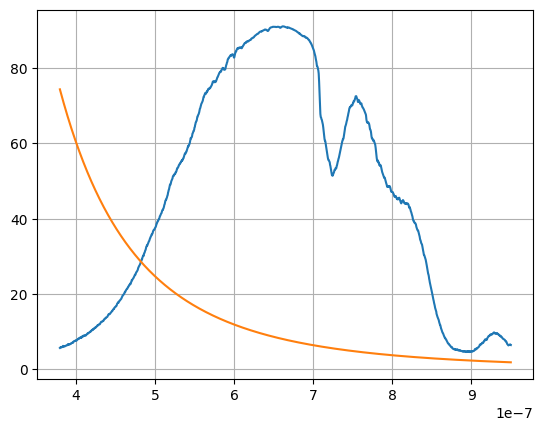

In [28]:
fig, axe = plt.subplots()
axe.plot(data["Wavelength"], data["Intensity"])
axe.plot(data["Wavelength"], yhat)
axe.grid()